In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

def visualize_embeddings(embeddings1, embeddings2, embeddings3, embeddings4, labels1=None, labels2=None, labels3=None, labels4=None):
    combined_embeddings = np.vstack((embeddings1, embeddings2, embeddings3, embeddings4))

    # Unnormalized PCA
    pca_2d_unnormalized = PCA(n_components=2)
    pca_result_2d_unnormalized = pca_2d_unnormalized.fit_transform(combined_embeddings)

    pca_3d_unnormalized = PCA(n_components=3)
    pca_result_3d_unnormalized = pca_3d_unnormalized.fit_transform(combined_embeddings)

    # Normalize the data for the normalized PCA
    scaler = StandardScaler()
    normalized_embeddings = scaler.fit_transform(combined_embeddings)

    pca_2d_normalized = PCA(n_components=2)
    pca_result_2d_normalized = pca_2d_normalized.fit_transform(normalized_embeddings)

    pca_3d_normalized = PCA(n_components=3)
    pca_result_3d_normalized = pca_3d_normalized.fit_transform(normalized_embeddings)

    # Combine labels
    combined_labels = np.concatenate((labels1, labels2, labels3, labels4))

    def plot_2d_pca(embeddings, title, combined_labels):
        currentIndex = 0
        plt.figure(figsize=(10, 8))
        plt.scatter(embeddings[currentIndex:currentIndex + len(labels1), 0], 
                    embeddings[currentIndex:currentIndex + len(labels1), 1], 
                    label='Random Embeddings - Avg AA', alpha=0.5)
        currentIndex += len(labels1)
        plt.scatter(embeddings[currentIndex:currentIndex + len(labels2), 0], 
                    embeddings[currentIndex:currentIndex + len(labels2), 1], 
                    label='Real Embeddings', alpha=0.5)
        currentIndex += len(labels2)
        plt.scatter(embeddings[currentIndex:currentIndex + len(labels3), 0], 
                    embeddings[currentIndex:currentIndex + len(labels3), 1], 
                    label='Random Embeddings - Equal AA', alpha=0.5)
        currentIndex += len(labels3)
        plt.scatter(embeddings[currentIndex:currentIndex + len(labels4), 0], 
                    embeddings[currentIndex:currentIndex + len(labels4), 1], 
                    label='Shuffled Embeddings', alpha=0.5)
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.legend()
        plt.title(title)
        plt.show()

    def plot_3d_pca(embeddings, title, combined_labels):
        currentIndex = 0
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(embeddings[currentIndex:currentIndex + len(labels1), 0], 
                   embeddings[currentIndex:currentIndex + len(labels1), 1], 
                   embeddings[currentIndex:currentIndex + len(labels1), 2],
                   label='Random Embeddings - Avg AA', alpha=0.5)
        currentIndex += len(labels1)
        ax.scatter(embeddings[currentIndex:currentIndex + len(labels2), 0], 
                   embeddings[currentIndex:currentIndex + len(labels2), 1], 
                   embeddings[currentIndex:currentIndex + len(labels2), 2],
                   label='Real Embeddings', alpha=0.5)
        currentIndex += len(labels2)
        ax.scatter(embeddings[currentIndex:currentIndex + len(labels3), 0], 
                   embeddings[currentIndex:currentIndex + len(labels3), 1], 
                   embeddings[currentIndex:currentIndex + len(labels3), 2],
                   label='Random Embeddings - Equal AA', alpha=0.5)
        currentIndex += len(labels3)
        ax.scatter(embeddings[currentIndex:currentIndex + len(labels4), 0], 
                   embeddings[currentIndex:currentIndex + len(labels4), 1], 
                   embeddings[currentIndex:currentIndex + len(labels4), 2],
                   label='Shuffled Embeddings', alpha=0.5)
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.set_zlabel('Component 3')
        ax.legend()
        plt.title(title)
        plt.show()

    # Plot 2D and 3D PCA for both unnormalized and normalized data
    plot_2d_pca(pca_result_2d_unnormalized, 'PCA 2D Projection (Unnormalized)', combined_labels)
    plot_3d_pca(pca_result_3d_unnormalized, 'PCA 3D Projection (Unnormalized)', combined_labels)

    plot_2d_pca(pca_result_2d_normalized, 'PCA 2D Projection (Normalized)', combined_labels)
    plot_3d_pca(pca_result_3d_normalized, 'PCA 3D Projection (Normalized)', combined_labels)


In [14]:
import sqlite3
# load the embedding data from the unshuffled sequences
# ids are in ruseq.txt
conn = sqlite3.connect('uniref90-10pm.db')
c = conn.cursor()

# get the embeddings
embeddings_unshuff = []
with open('./rs/ruseq.txt') as f:
    keys = f.read().splitlines()

for key in keys:
    c.execute('SELECT embedding FROM uniref90 WHERE name = ?', (key,))
    embedding = c.fetchone()[0]
    if np.frombuffer(embedding, dtype=np.float16).shape[0] != 1024:
        embeddings_unshuff.append(np.frombuffer(embedding, dtype=np.float32))
    else:
        embeddings_unshuff.append(np.frombuffer(embedding, dtype=np.float16))

embeddings2 = np.array(embeddings_unshuff)
labels2 = keys
conn.close()

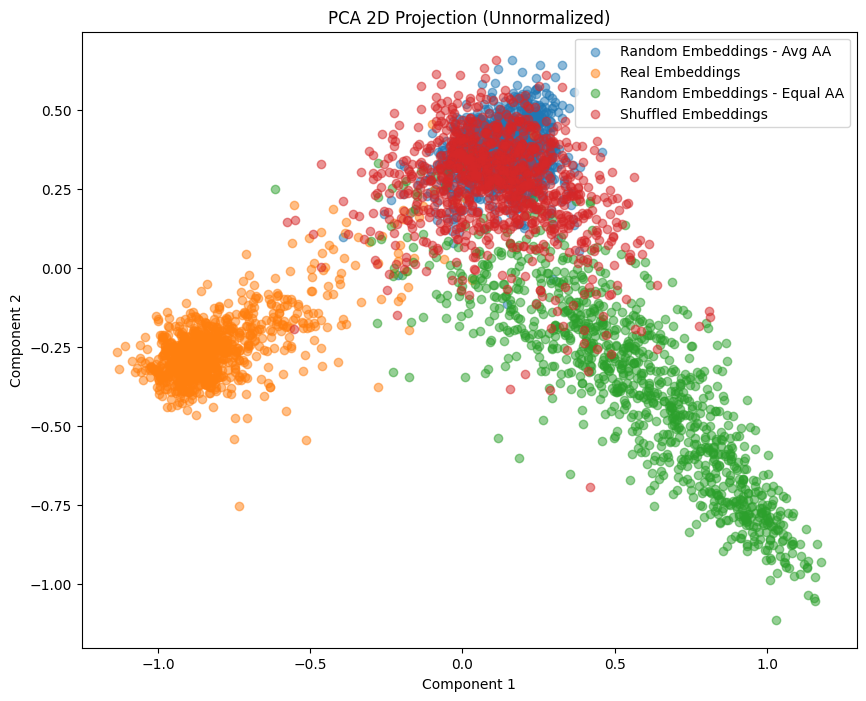

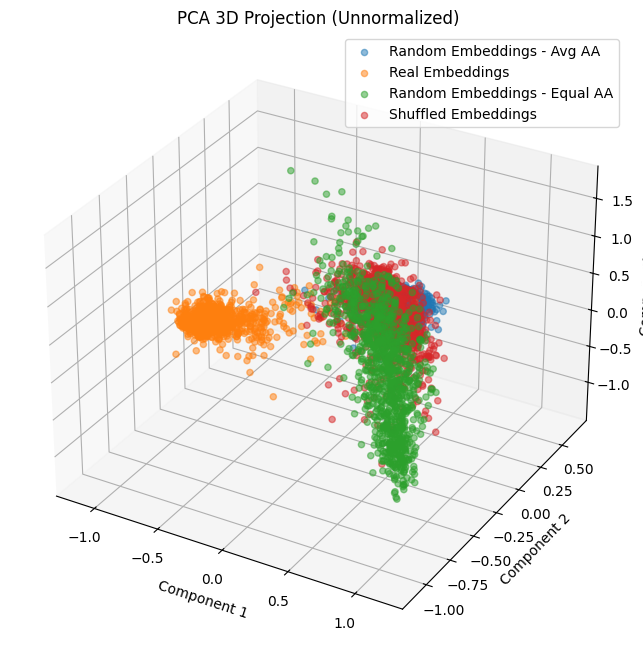

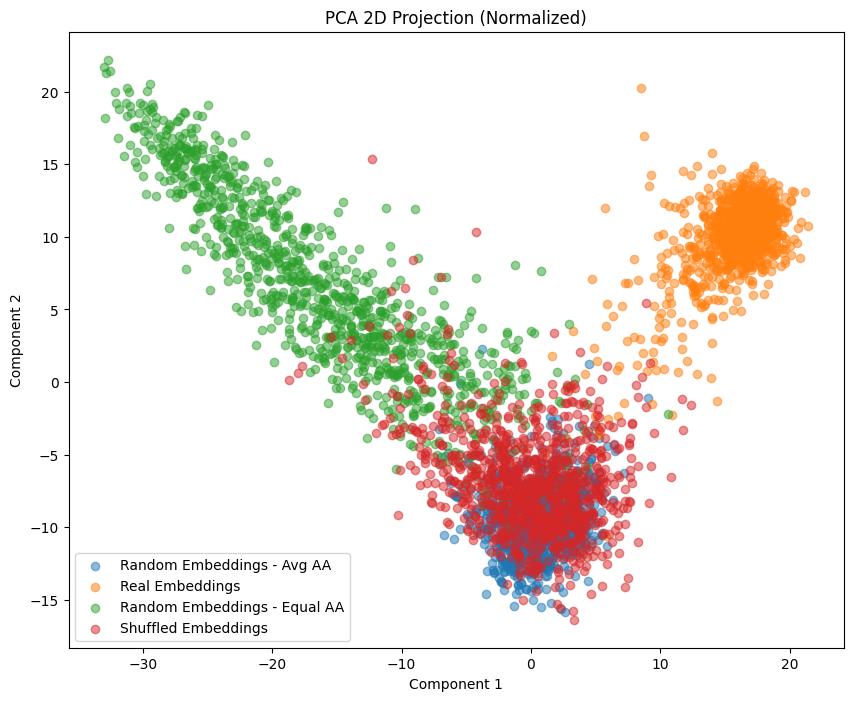

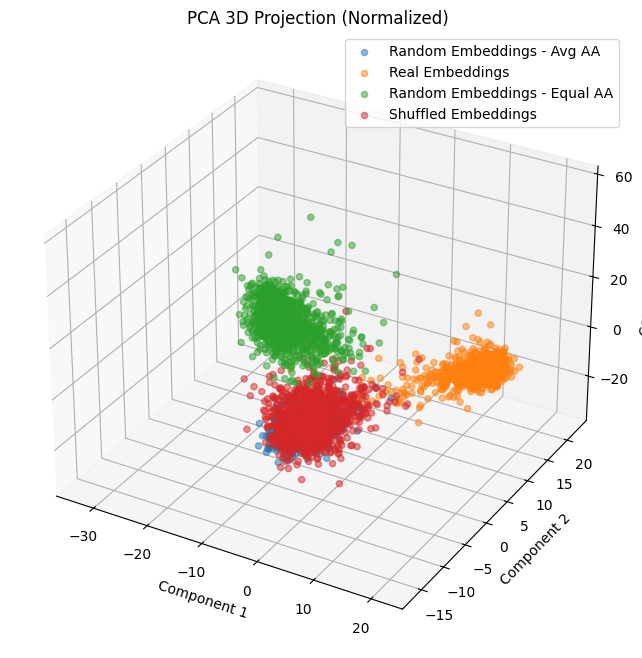

In [15]:
import h5py
embeddings1 = np.load("./rg/embeddings_by_composition.npy")
#labels1 is in a txt file
with open("./rg/random_sequences_by_composition.txt") as f:
    labels1 = f.read().splitlines()
embeddings3 = np.load("./rg/embeddings_by_length.npy")
with open("./rg/random_sequences_by_length.txt") as f:
    labels3 = f.read().splitlines()

embeddings4 = []
labels4 = []
with h5py.File('./rs/rss.h5', 'r') as f:
    for key in f.keys():
        embeddings4.append(f[key][:])
        labels4.append(key)

embeddings4 = np.array(embeddings4)

# Example usage
visualize_embeddings(embeddings1, embeddings2,  embeddings3, embeddings4, labels1, labels2, labels3, labels4)


In [5]:
# add a first row label\tembedding1\tembedding2\t...\tembedding1024
header = np.array(['label'] + [f'embedding_{i}' for i in range(1024)]).reshape(1, -1)

# convert to tab separated values
embeddings1 = np.load("./rg/embeddings_by_composition.npy")
labels1 = np.array(['random_c'] * embeddings1.shape[0]).reshape(-1, 1)
embeddings2 = np.array(embeddings_unshuff)
labels2 = np.array(['real'] * embeddings2.shape[0]).reshape(-1, 1)
embeddings3 = np.load("./rg/embeddings_by_length.npy")
labels3 = np.array(['random_l'] * embeddings3.shape[0]).reshape(-1, 1)
labels4 = np.array(['shuffled'] * embeddings4.shape[0]).reshape(-1, 1)

# Combine all embeddings and labels and attach labels to begining of the array
combined_embeddings = np.vstack((embeddings1, embeddings2, embeddings3, embeddings4))
combined_labels = np.vstack((labels1, labels2, labels3, labels4))
combined_data = np.hstack((combined_labels, combined_embeddings))
combined_data = np.vstack((header, combined_data))

# Save to a tab-separated file
np.savetxt('combined_embeddings.tsv', combined_embeddings, delimiter='\t', fmt='%s')
np.savetxt('combined_metadata.tsv', combined_data, delimiter='\t', fmt='%s')



